# Image deburring via regularizd least squares - TEMPLATE
**Matthias Heinkenschloss**,
**Department of Computational and Applied Mathematics**, **Rice University**
**September 6, 2021**

We want to reconstruct an image from a blurred version using regularized least squares.
The true image is represented by a function $f: [0,1] \rightarrow [0,1]$ (think of $f(\xi)$ as the gray scale of a one-dimensional image at $\xi$ with gray values scaled to $[0,1]$). 
          
The blurred image $g: [0,1] \rightarrow \mathbb{R}$ is given by
$$
    \int_0^1 k(\xi_1,\xi_2) f(\xi_2) \, d\xi_2 = g(\xi_1), \quad \xi_1 \in [0,1],
    \qquad (*)
$$
where $k: [0,1]^2 \rightarrow [0,\infty)$ is given by
$$
                  k(\xi_1,\xi_2) = \frac{1}{ \gamma \sqrt{2\pi} } \exp\big( -(\xi_1-\xi_2)^2 / (2\gamma^2) \big),
$$
with $\gamma > 0$. We use $\gamma = 0.05$.
The map $f \mapsto  g = \int_0^1 k(\cdot,\xi_2) f(\xi_2) d\xi_2$ is called a convolution
and $k$ is called the (convolution) kernel. 
 

In [1]:
# import packages
import numpy as np
import math as m
import matplotlib.pyplot as plt

To discretize the problem, 
we divide $[0,1]$ into $n$ equidistant intervals of 

length $h = 1/n$.Let $\xi_i = (i-1/2)h$ be the midpoint of the $i$th interval. 
We approximate $f$ and $g$ by piecewiseconstant functions,
$$
                f(\xi) \approx \sum_{i=1}^n f_i \chi_{[(i-1)h,ih]}(\xi), \qquad
                g(\xi) \approx \sum_{i=1}^n g_i \chi_{[(i-1)h,ih]}(\xi),
$$
where $\chi_I$ is the indicator function on the interval $I$. 
We insert these approximations into (*)
and approximate the integral by the midpoint rule.
his leads to the $n \times n$ linear system
$$
                   {\bf K}   {\bf f} =   {\bf g},
$$
where
$$
               {\bf f} = (f_1, \ldots, f_n)^T, \quad
               {\bf g} = (g_1, \ldots, g_n)^T, 
$$
and
$$
               {\bf K}_{ij} = h\, k(\xi_i,\xi_j) , \quad i,j = 1, \ldots, n.     
$$


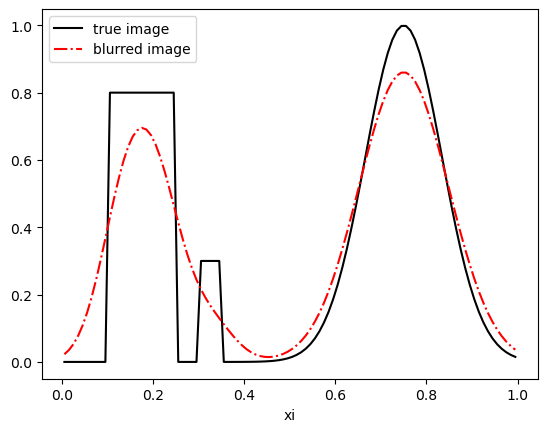

In [2]:
# specify problem
n = 100
h = 1/n
gamma = 0.05
xi = np.arange(1/2, n, dtype=float)/n
# true image
ftrue = np.exp( -(xi-0.75)**2 *70 )
ind = np.all([0.1<=xi, xi<=0.25], axis =0)  # indices for which xi in [0.1,0.25]
ftrue[ind] = 0.8
ind = np.all([0.3<=xi, xi<=0.35], axis =0)  # indices for which xi in [0.3,0.35]
ftrue[ind] = 0.3
# matrix K
C = 1/(gamma*np.sqrt(2*np.pi))
K = np.zeros((n,n))
for i in np.arange(n):
    for j in np.arange(n):
        K[i,j] = C*h* np.exp( -(xi[i]-xi[j])**2 / (2*gamma**2) )

gtrue = np.dot(K, ftrue)
                         
fig, ax = plt.subplots()
ax.plot(xi, ftrue, '-k')
ax.plot(xi, gtrue, '-.r')
ax.legend(['true image','blurred image'])
ax.set(xlabel='xi')

#fig.savefig("denoise_1d_ftrue")
plt.show()



In [3]:
# add error to true image
gerr = 0.001*np.multiply( 0.5 - np.random.uniform(0.05,0.5,n) , gtrue ) 
g = gtrue + gerr
gerror = 0.5*np.linalg.norm(gerr, 2)**2

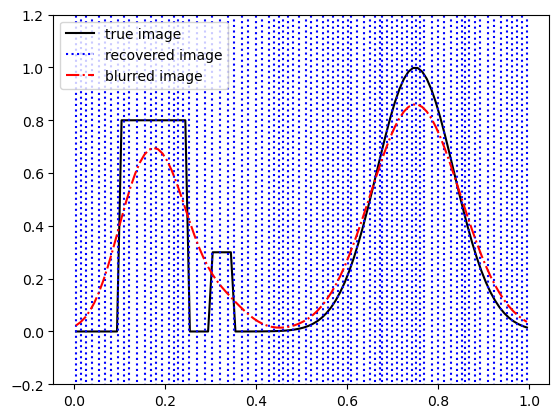

In [4]:
# naive reconstruction by solving linear system
f = np.linalg.solve(K, g)

fig, ax = plt.subplots()
ax.plot(xi, ftrue, '-k')
ax.plot(xi, f, ':b')
ax.plot(xi, gtrue, '-.r')
ax.legend(['true image','recovered image','blurred image'])
ax.set_ylim(-0.2, 1.2)

#fig.savefig("denoise_1d_frecovered2.png")
plt.show()

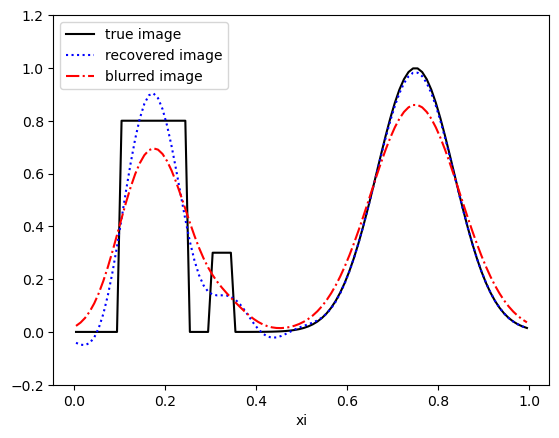

In [6]:
# reconstruction by solving linear least squares with fixed lambda
lam = 1.e-2
KK = np.vstack( (K, np.sqrt(lam)*np.identity(n)) )
gg = np.hstack( (g, np.zeros(n)) )
flam = np.linalg.lstsq(KK,gg,rcond=None)[0]

fig, ax = plt.subplots()
ax.plot(xi, ftrue, '-k')
ax.plot(xi, flam, ':b')
ax.plot(xi, gtrue, '-.r')
ax.legend(['true image','recovered image','blurred image'])
ax.set(xlabel='xi')
ax.set_ylim(-0.2, 1.2)

#fig.savefig("denoise_1d_frecovered2.png")
plt.show()